In [34]:
import keras
keras.__version__

'3.5.0'

In [35]:
#train, test data 로드

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
#num_words=10000 : train data에서 자주 나타나는 1만 개의 단어를 사용하겟다
#train data, test data :  리뷰의 목록 (단어 인덱스 list) / train, test labels : 부정(0), 긍정(1)의 list

In [36]:
#정수 seq -> binary 행렬로

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# train data를 vector 변환
x_train = vectorize_sequences(train_data)
# test data를 vector 변환
x_test = vectorize_sequences(test_data)

In [37]:
#def model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))   # Dense에 전달한 parameter 16 = hidden unit := hidden layer에서 input을 처리하는 기본단위. dim으로 이해하면 될 듯
model.add(layers.Dense(16, activation='relu'))                         # 여기서 activation ftn = relu 
model.add(layers.Dense(1, activation='sigmoid'))                       # sigmoid ftn :  output range가 (0,1), diff, nonlinearity
                                                                       # nonlinearity면 model이 복잡한 data pattern을 학습하게 함

In [38]:
#complie model

model.compile(optimizer='rmsprop',           #keras에 각각이 포함되어 있어서 optimizer,loss ftn,mertics 각각에 문자열로 쟤네를 지정할 수 있다.
              loss='binary_crossentropy',    #최신버전은 acc라고 쓰면 오류뜰 수도 있음.
              metrics=['accuracy'])

In [39]:
#set optimizer

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), 
              #lr=0.001하면 오류 떠서 learning_rate로 풀네임 쳐주면 해결됨
              #최신버전 keras는 lr로 하면 오류가 뜬다~
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
#loss, metrics 함수 객체로 지정하기

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [41]:
#검증 세트 준비

x_val = x_train[:10000]                 #원본 train data에서 10,000개 sample 떼어 만든다.
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [42]:
#train model

history = model.fit(partial_x_train,                        #model.fit(): History 객체 반환.
                    partial_y_train,                        #history 객체 : 각 epoch에서의 loss, matric값 저장
                    epochs=20,                              #epoch:= 전체 train dataset이 모델을 통해 한 번 완전히 통과한 것. 모델이 dataset의 모든 샘플을 한 번씩 학습 = 한 에포크가 끝남.
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - binary_accuracy: 0.6880 - loss: 0.6156 - val_binary_accuracy: 0.8454 - val_loss: 0.4310
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.8849 - loss: 0.3613 - val_binary_accuracy: 0.8840 - val_loss: 0.3141
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9231 - loss: 0.2489 - val_binary_accuracy: 0.8864 - val_loss: 0.2894
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9353 - loss: 0.1975 - val_binary_accuracy: 0.8847 - val_loss: 0.2928
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9493 - loss: 0.1611 - val_binary_accuracy: 0.8780 - val_loss: 0.2992
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9574 - loss: 0.1368 - val_binary_accuracy: 0.8862 - val_loss: 0.2847
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9675 - loss: 0.1104 - val_binary_accuracy: 0.8828 - val_loss: 0.2990
Epoch 8/20
30

In [43]:

import matplotlib.pyplot as plt

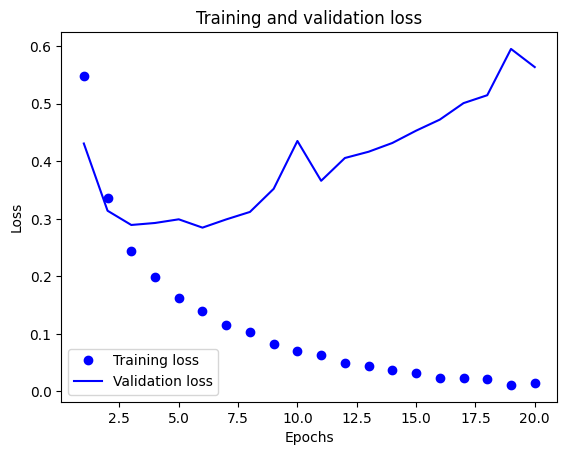

In [44]:
#train, 검증손실 그리기

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

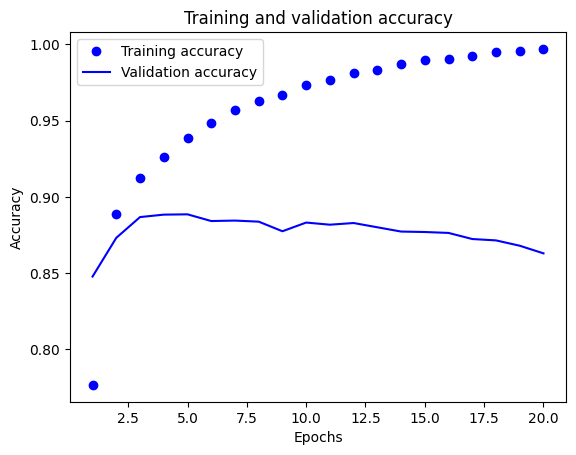

In [32]:

plt.clf()   # 그래프 초기화
accuracy = history_dict['binary_accuracy']   
#위에서 지정한 martics랑 key 이름을 맞춰서 오류 해결. 위에는 acc로, 아래는 accuracy로 되어있었음.
val_accuracy = history_dict['val_binary_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

위 그래프 분석
훈련 손실이 epoch마다 감소
훈련 정확도는 epoch마다 증가
4th epoch에서 그래프가 역전
=> 2nd epoch 이후부터 train data에 과도하게 최적화되어 train set 이외의 data에 일반화되지 못함
:= 과대적합(overfitting)
overfitting 방지? =>3rd epoch 이후 train 중지.

In [45]:
#modle을 처음부터 다시 훈련

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

c:\Users\alpha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7343 - loss: 0.5721
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8977 - loss: 0.3005
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9176 - loss: 0.2262
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9341 - loss: 0.1878
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.8859 - loss: 0.2823


In [21]:
#최종 결과
results

[0.2929238975048065, 0.8825600147247314]

88%의 정확도

In [22]:
#어떤 리뷰가 긍정일 확률 예측
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step


array([[0.26197022],
       [0.999313  ],
       [0.87532   ],
       ...,
       [0.14685966],
       [0.11269186],
       [0.64619815]], dtype=float32)

0.99 이상, 0.01 이하 : sample에 대한 확신
나머지 sample은 확신이 부족한거임

추가 실험
2개의 hidden layers -> 1개/3개로 변경해보기
hidden unit 추가/줄여보기 (32, 64개, ...)
binary_crossentropy 대신 mse loss ftn 써보기
relu 대신 tanh activation ftn 써보기                 #tanh는 초창기 신경망에서 인기있었던 함수.